<h1 style="color:blue; text-align:center;">T20I Score Predictor</h1>



#### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# For ignoring Warnings while running Python codes.

import warnings
warnings.filterwarnings('ignore',category = DeprecationWarning)
warnings.filterwarnings('ignore',category = UserWarning)
warnings.filterwarnings('ignore',category = RuntimeWarning)
warnings.filterwarnings('ignore',category = FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

#### Loading the Dataset

In [3]:
df = pd.read_csv('ball_by_ball_it20.csv')

In [4]:
df

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,...,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,...,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,...,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,...,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,...,South Africa,1,4,1,2,1,NaN,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425114,425114,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,2,TK Curran,...,New Zealand,0,11,2,9,2,NaN,NaN,0,1
425115,425115,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,3,TK Curran,...,New Zealand,0,12,2,10,2,NaN,NaN,1,1
425116,425116,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,4,S Mahmood,...,New Zealand,0,2,12,3,10,NaN,NaN,0,1
425117,425117,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,5,S Mahmood,...,New Zealand,0,3,12,4,10,NaN,NaN,1,1


## <span style="color:blue">Feature Extraction</span>

*Since we are predicting the score for the first innings only, we filter out the data to include only the records from the first innings.*

In [5]:
df = df[df['Innings'] != 2]

In [6]:
df.sample(10)

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
240275,240275,1307163,2022-08-17,Civil Service Cricket Club,Afghanistan,Ireland,1,8,3,Najibullah Zadran,...,Ireland,1,7,5,11,15,NaN,NaN,0,1
319595,319595,520598,2012-02-19,Seddon Park,New Zealand,South Africa,1,17,3,JEC Franklin,...,South Africa,1,27,4,8,9,NaN,NaN,1,1
270844,270844,1310185,2022-05-15,Marsa Sports Club,Gibraltar,Bulgaria,1,1,1,BA Pai,...,Bulgaria,1,1,0,2,0,NaN,NaN,1,1
161983,161983,1283049,2021-11-06,Gahanga International Cricket Stadium. Rwanda,Tanzania,Cameroon,1,2,6,II Selemani,...,Tanzania,0,13,10,6,8,NaN,NaN,6,1
148371,148371,1359794,2023-02-25,Hurlingham Club Ground,Panama,Argentina,1,18,1,RDB Ahir,...,Panama,0,2,6,2,3,NaN,NaN,1,1
373486,373486,1273146,2021-08-21,Kerava National Cricket Ground,Sweden,Finland,1,16,5,Dipanjan Dey,...,Finland,1,15,18,8,21,NaN,NaN,6,1
67128,67128,951363,2016-03-27,Punjab Cricket Association IS Bindra Stadium,Australia,India,1,14,5,GJ Maxwell,...,India,1,16,0,20,0,NaN,NaN,1,1
87199,87199,573672,2012-07-26,Sportpark Westvliet,Bangladesh,Netherlands,1,10,2,Tamim Iqbal,...,Netherlands,1,21,32,22,21,NaN,NaN,2,1
74460,74460,1199525,2019-10-24,ICC Academy,Netherlands,Papua New Guinea,1,14,3,SA Edwards,...,Papua New Guinea,1,5,9,3,15,NaN,NaN,1,1
343064,343064,1310182,2022-05-14,Marsa Sports Club,Hungary,Czech Republic,1,8,6,Abhijeet Ahuja,...,Czech Republic,1,20,9,22,18,NaN,NaN,6,1


#### Removing Irrelevant Features

In [7]:
df.columns

Index(['Unnamed: 0', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs',
       'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')

In [8]:
df.drop(columns=['Unnamed: 0','Innings','Batter', 'Non Striker', 'Bowler','Extra Type','Ball Rebowled','Method', 'Player Out','Target Score', 'Runs to Get',
                 'Balls Remaining','Winner', 'Chased Successfully','Total Batter Runs','Batter Runs','Extra Runs','Wicket','Total Non Striker Runs', 'Batter Balls Faced',
                 'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced','Bowler Runs Conceded'],inplace=True)

In [9]:
df.shape

(224815, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224815 entries, 0 to 424993
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Match ID         224815 non-null  int64 
 1   Date             224815 non-null  object
 2   Venue            224815 non-null  object
 3   Bat First        224815 non-null  object
 4   Bat Second       224815 non-null  object
 5   Over             224815 non-null  int64 
 6   Ball             224815 non-null  int64 
 7   Runs From Ball   224815 non-null  int64 
 8   Innings Runs     224815 non-null  int64 
 9   Innings Wickets  224815 non-null  int64 
 10  Valid Ball       224815 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 20.6+ MB


***To uniquely identify each T20I match in our dataset, we recreate the 'Match ID' column. This will help in grouping and analyzing the data on a per-match basis.***

In [11]:
df['Match ID'] = df.groupby('Date').ngroup() + 1

In [12]:
df = df.sort_values(by=['Match ID','Over','Ball'])

In [13]:
df

,Match ID,Date,Venue,Bat First,Bat Second,Over,Ball,Runs From Ball,Innings Runs,Innings Wickets,Valid Ball
23282,1,2005-02-17,Eden Park,Australia,New Zealand,1,1,1,1,0,0
23283,1,2005-02-17,Eden Park,Australia,New Zealand,1,1,1,2,0,1
23284,1,2005-02-17,Eden Park,Australia,New Zealand,1,2,0,2,0,1
23285,1,2005-02-17,Eden Park,Australia,New Zealand,1,3,1,3,0,1
23286,1,2005-02-17,Eden Park,Australia,New Zealand,1,4,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...
244365,1115,2023-08-22,Gahanga International Cricket Stadium,Rwanda,Tanzania,20,5,1,153,6,1
260136,1115,2023-08-22,Gahanga International Cricket Stadium,Uganda,Rwanda,20,5,1,186,8,0
260137,1115,2023-08-22,Gahanga International Cricket Stadium,Uganda,Rwanda,20,5,0,186,9,1
244366,1115,2023-08-22,Gahanga International Cricket Stadium,Rwanda,Tanzania,20,6,1,154,6,1


*We check the dataset for any records where the 'Over' value is greater than 20, as this would indicate invalid data (since an innings in T20 cricket has a maximum of 20 overs).*

In [14]:
df[df['Over']>20].shape[0]

0

***To align our analysis with the current pace of T20 cricket, we filter the dataset to include matches from January 1, 2011 onwards. T20 cricket has evolved rapidly, with players adapting to the faster pace of the game over time. Matches played earlier might not reflect the current dynamics accurately.***

In [15]:
cutoff_date = '2011-01-01'

df = df[df['Date'] >= cutoff_date]

df

,Match ID,Date,Venue,Bat First,Bat Second,Over,Ball,Runs From Ball,Innings Runs,Innings Wickets,Valid Ball
225972,126,2011-01-09,Moses Mabhida Stadium,India,South Africa,1,1,1,1,0,1
225973,126,2011-01-09,Moses Mabhida Stadium,India,South Africa,1,2,0,1,0,1
225974,126,2011-01-09,Moses Mabhida Stadium,India,South Africa,1,3,0,1,0,1
225975,126,2011-01-09,Moses Mabhida Stadium,India,South Africa,1,4,4,5,0,1
225976,126,2011-01-09,Moses Mabhida Stadium,India,South Africa,1,5,1,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...
244365,1115,2023-08-22,Gahanga International Cricket Stadium,Rwanda,Tanzania,20,5,1,153,6,1
260136,1115,2023-08-22,Gahanga International Cricket Stadium,Uganda,Rwanda,20,5,1,186,8,0
260137,1115,2023-08-22,Gahanga International Cricket Stadium,Uganda,Rwanda,20,5,0,186,9,1
244366,1115,2023-08-22,Gahanga International Cricket Stadium,Rwanda,Tanzania,20,6,1,154,6,1


In [16]:
df.drop(columns='Date',inplace=True)

#### Filtering Data for Top Teams

*To ensure the quality and competitiveness of the matches in our dataset, we filter the data to include only those games where both teams are among the top 12 cricketing nations. This helps in focusing the analysis on matches that are more representative of high-level T20 cricket.*

In [17]:
top_teams = ['India','Australia','England','West Indies','New Zealand','Pakistan',
             'South Africa','Sri Lanka','Bangladesh','Afghanistan','Ireland','Zimbabwe']

In [18]:
df['Bat First'].unique()

array(['India', 'Australia', 'West Indies', 'England', 'Sri Lanka',
       'Pakistan', 'South Africa', 'Zimbabwe', 'New Zealand', 'Kenya',
       'Ireland', 'Netherlands', 'Afghanistan', 'Canada', 'Bangladesh',
       'Scotland', 'Nepal', 'United Arab Emirates', 'Hong Kong',
       'Papua New Guinea', 'Oman', 'Vanuatu', 'Philippines', 'Ghana',
       'Uganda', 'Nigeria', 'Namibia', 'Botswana', 'Germany', 'Guernsey',
       'Jersey', 'Italy', 'Denmark', 'Norway', 'Thailand', 'Maldives',
       'Malaysia', 'Singapore', 'Kuwait', 'Bermuda', 'Cayman Islands',
       'United States of America', 'Portugal', 'Gibraltar', 'Spain',
       'Bhutan', 'Qatar', 'Iran', 'Isle of Man', 'Belgium', 'Bulgaria',
       'Romania', 'Luxembourg', 'Czech Republic', 'Austria', 'Greece',
       'Serbia', 'Malta', 'France', 'Sweden', 'Rwanda', 'Finland',
       'Hungary', 'Estonia', 'Cyprus', 'Seychelles', 'Swaziland',
       'Malawi', 'Lesotho', 'Sierra Leone', 'Switzerland', 'Bahrain',
       'Tanzania', 'Moz

In [19]:
df = df[df['Bat First'].isin(top_teams)]
df = df[df['Bat Second'].isin(top_teams)]

In [20]:
df['Bat First'].unique()

array(['India', 'Australia', 'West Indies', 'England', 'Sri Lanka',
       'Pakistan', 'South Africa', 'Zimbabwe', 'New Zealand',
       'Afghanistan', 'Bangladesh', 'Ireland'], dtype=object)

#### Mapping Venues to Countries 

*To enhance our dataset, we map each venue to its corresponding country. This can help in venue-based analysis of matches.*

In [21]:
df['Venue'].nunique()

104

In [22]:
df['Venue'].unique()

array(['Moses Mabhida Stadium', 'Adelaide Oval',
       'Melbourne Cricket Ground', 'Beausejour Stadium',
       "Queen's Park Oval", 'County Ground',
       'Pallekele International Cricket Stadium', 'Old Trafford',
       'Harare Sports Club', 'Kennington Oval',
       'Shere Bangla National Stadium', 'Newlands',
       'New Wanderers Stadium', 'Eden Gardens', 'Sheikh Zayed Stadium',
       'Stadium Australia', 'Eden Park', 'Seddon Park', 'Westpac Stadium',
       'Dubai International Cricket Stadium', 'Kensington Oval',
       'Mahinda Rajapaksa International Cricket Stadium', 'Trent Bridge',
       'Central Broward Regional Park Stadium Turf Ground',
       'Civil Service Cricket Club', 'Riverside Ground',
       'MA Chidambaram Stadium', 'Edgbaston', 'R Premadasa Stadium',
       'Subrata Roy Sahara Stadium', 'Kingsmead', 'Wankhede Stadium',
       'Buffalo Park', 'M Chinnaswamy Stadium', "St George's Park",
       'Sardar Patel Stadium', 'Brisbane Cricket Ground',
       'Sir Viv

In [23]:
venue_to_country = {
    'Moses Mabhida Stadium': 'South Africa',
    'Adelaide Oval': 'Australia',
    'Melbourne Cricket Ground': 'Australia',
    'Beausejour Stadium': 'West Indies',
    "Queen's Park Oval": 'West Indies',
    'County Ground': 'England',
    'Pallekele International Cricket Stadium': 'Sri Lanka',
    'Old Trafford': 'England',
    'Harare Sports Club': 'Zimbabwe',
    'Kennington Oval': 'England',
    'Shere Bangla National Stadium': 'Bangladesh',
    'Newlands': 'South Africa',
    'New Wanderers Stadium': 'South Africa',
    'Eden Gardens': 'India',
    'Sheikh Zayed Stadium': 'UAE',
    'Stadium Australia': 'Australia',
    'Eden Park': 'New Zealand',
    'Seddon Park': 'New Zealand',
    'Westpac Stadium': 'New Zealand',
    'Dubai International Cricket Stadium': 'UAE',
    'Kensington Oval': 'West Indies',
    'Mahinda Rajapaksa International Cricket Stadium': 'Sri Lanka',
    'Trent Bridge': 'England',
    'Central Broward Regional Park Stadium Turf Ground': 'USA',
    'Civil Service Cricket Club': 'Ireland',
    'Riverside Ground': 'England',
    'MA Chidambaram Stadium': 'India',
    'Edgbaston': 'England',
    'R Premadasa Stadium': 'Sri Lanka',
    'Subrata Roy Sahara Stadium': 'India',
    'Kingsmead': 'South Africa',
    'Wankhede Stadium': 'India',
    'Buffalo Park': 'South Africa',
    'M Chinnaswamy Stadium': 'India',
    "St George's Park": 'South Africa',
    'Sardar Patel Stadium': 'India',
    'Brisbane Cricket Ground': 'Australia',
    'Sir Vivian Richards Stadium': 'West Indies',
    'SuperSport Park': 'South Africa',
    'Queens Sports Club': 'Zimbabwe',
    'Arnos Vale Ground': 'West Indies',
    'The Rose Bowl': 'England',
    'Saurashtra Cricket Association Stadium': 'India',
    'Sharjah Cricket Stadium': 'UAE',
    'Bellerive Oval': 'Australia',
    'Zahur Ahmed Chowdhury Stadium': 'Bangladesh',
    'Sabina Park': 'West Indies',
    'Sylhet Stadium': 'Bangladesh',
    'Windsor Park': 'West Indies',
    'Gaddafi Stadium': 'Pakistan',
    'Sophia Gardens': 'England',
    'Himachal Pradesh Cricket Association Stadium': 'India',
    'Barabati Stadium': 'India',
    'Bay Oval': 'New Zealand',
    'Sheikh Abu Naser Stadium': 'Bangladesh',
    'Sydney Cricket Ground': 'Australia',
    'Maharashtra Cricket Association Stadium': 'India',
    'JSCA International Stadium Complex': 'India',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 'India',
    'Vidarbha Cricket Association Stadium': 'India',
    'Punjab Cricket Association IS Bindra Stadium': 'India',
    'Feroz Shah Kotla': 'India',
    'McLean Park': 'New Zealand',
    'Green Park': 'India',
    'Simonds Stadium': 'Australia',
    'Greater Noida Sports Complex Ground': 'India',
    'Warner Park': 'West Indies',
    'Barsapara Cricket Stadium': 'India',
    'Mangaung Oval': 'South Africa',
    'R.Premadasa Stadium':'Sri Lanka',
    'Senwes Park': 'South Africa',
    'Arun Jaitley Stadium': 'India',
    'Greenfield International Stadium': 'India',
    'Holkar Cricket Stadium': 'India',
    'Saxton Oval': 'New Zealand',
    'The Wanderers Stadium': 'South Africa',
    'Sylhet International Cricket Stadium': 'Bangladesh',
    'National Stadium': 'Pakistan',
    'Rajiv Gandhi International Cricket Stadium': 'India',
    'The Village': 'Ireland',
    'Bready Cricket Club': 'Ireland',
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium': 'India',
    'Carrara Oval': 'Australia',
    'M.Chinnaswamy Stadium': 'India',
    'Darren Sammy National Cricket Stadium': 'West Indies',
    'Providence Stadium': 'West Indies',
    'Hagley Oval': 'New Zealand',
    'Manuka Oval': 'Australia',
    'Perth Stadium': 'Australia',
    'Rajiv Gandhi International Stadium': 'India',
    'National Cricket Stadium': 'West Indies',
    'Rawalpindi Cricket Stadium': 'Pakistan',
    'Boland Park': 'South Africa',
    'University Oval': 'New Zealand',
    'Coolidge Cricket Ground': 'West Indies',
    'Sky Stadium': 'New Zealand',
    'Narendra Modi Stadium': 'India',
    'Headingley': 'England',
    'Castle Avenue': 'Ireland',
    'Zayed Cricket Stadium': 'UAE',
    'Sawai Mansingh Stadium': 'India',
    'Brian Lara Stadium': 'West Indies',
    'John Davies Oval': 'New Zealand',
    'Malahide': 'Ireland'
}

In [24]:
df['Location'] = df['Venue'].map(venue_to_country)

In [25]:
df.isnull().sum()

Match ID           0
Venue              0
Bat First          0
Bat Second         0
Over               0
Ball               0
Runs From Ball     0
Innings Runs       0
Innings Wickets    0
Valid Ball         0
Location           0
dtype: int64

In [26]:
df.sample(10)

,Match ID,Venue,Bat First,Bat Second,Over,Ball,Runs From Ball,Innings Runs,Innings Wickets,Valid Ball,Location
314899,361,Shere Bangla National Stadium,Sri Lanka,India,11,5,4,57,3,1,Bangladesh
324843,431,Warner Park,Afghanistan,West Indies,19,4,0,94,8,1,West Indies
126991,584,Shere Bangla National Stadium,Zimbabwe,Bangladesh,17,2,1,127,5,1,Bangladesh
14168,239,Pallekele International Cricket Stadium,New Zealand,Sri Lanka,2,6,4,12,1,1,Sri Lanka
267157,293,Gaddafi Stadium,Zimbabwe,Pakistan,7,4,2,58,0,1,Pakistan
209859,199,Wankhede Stadium,India,England,12,5,1,92,4,1,India
147820,171,Civil Service Cricket Club,Bangladesh,Ireland,6,2,1,36,1,1,Ireland
119249,167,Mahinda Rajapaksa International Cricket Stadium,Pakistan,Sri Lanka,18,4,1,103,4,1,Sri Lanka
324834,431,Warner Park,Afghanistan,West Indies,18,1,1,73,8,1,West Indies
18620,932,Sharjah Cricket Stadium,Bangladesh,Afghanistan,14,6,0,79,5,1,UAE


In [27]:
df.drop(columns=['Venue'],inplace=True)

In [28]:
df['Location'].unique()

array(['South Africa', 'Australia', 'West Indies', 'England', 'Sri Lanka',
       'Zimbabwe', 'Bangladesh', 'India', 'UAE', 'New Zealand', 'USA',
       'Ireland', 'Pakistan'], dtype=object)

In [29]:
df['Location'].value_counts()

Location
India           12879
UAE              9421
Australia        8374
Sri Lanka        8075
Bangladesh       8028
New Zealand      7603
West Indies      7410
South Africa     6379
England          5405
Zimbabwe         4963
Pakistan         3950
Ireland          3056
USA              1393
Name: count, dtype: int64

### Calculating Balls and Wickets Left

We define a function `calculate_balls_left` to compute the number of balls left in the innings for each delivery. This is crucial for understanding the context of each ball bowled, which can influence the predictive modeling.

In [30]:
def calculate_balls_left(df):
    def balls_bowled(over, ball):
        return (over - 1) * 6 + ball 

    # Initialize a new column 'Balls Left' with default value of 120
    df['Balls Left'] = 120

    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Extract over number and ball number from the current row
        over = row['Over']
        ball = row['Ball']
        is_valid = row['Valid Ball']

        # Calculate the number of balls bowled
        balls_bowled_current = balls_bowled(over, ball)

        # Update 'Balls Left' based on validity of the ball
        if is_valid:
            df.at[index, 'Balls Left'] -= balls_bowled_current
        else:
            df.at[index, 'Balls Left'] -= balls_bowled_current
            df.at[index, 'Balls Left'] += 1

    return df

df_with_balls_left = calculate_balls_left(df)

In [31]:
df = df_with_balls_left

In [32]:
df['Wickets Left'] = 10 - df['Innings Wickets']
df.sample(10)

,Match ID,Bat First,Bat Second,Over,Ball,Runs From Ball,Innings Runs,Innings Wickets,Valid Ball,Location,Balls Left,Wickets Left
420553,289,South Africa,West Indies,8,2,4,44,2,1,South Africa,76,8
122669,621,India,Bangladesh,8,1,1,45,2,1,India,77,8
76062,416,India,England,12,6,1,99,2,1,India,48,8
78918,447,Pakistan,Sri Lanka,6,1,0,37,0,1,Pakistan,89,10
126328,589,South Africa,India,17,1,1,123,3,1,India,23,7
318065,989,Australia,Afghanistan,9,4,4,78,3,1,Australia,68,7
403874,1024,Sri Lanka,India,5,5,0,49,0,1,India,91,10
106641,675,South Africa,England,18,1,1,113,5,1,South Africa,17,5
82472,1049,Pakistan,Afghanistan,7,4,1,37,3,1,UAE,80,7
403879,1024,Sri Lanka,India,6,4,1,53,0,1,India,86,10


##### **Calculating CRR and Renaming Columns**

*We calculate the Current Run Rate (CRR) to capture the scoring pace of the batting team. Additionally, we rename columns for better clarity and consistency.*

In [33]:
df['CRR'] = round((df['Innings Runs'] / (120 - df['Balls Left'])) * 6, 2)

In [34]:
df.rename(columns={'Bat First':'Batting Team','Bat Second':'Bowling Team','Innings Runs':'Runs Scored'},inplace=True)

In [35]:
df

,Match ID,Batting Team,Bowling Team,Over,Ball,Runs From Ball,Runs Scored,Innings Wickets,Valid Ball,Location,Balls Left,Wickets Left,CRR
225972,126,India,South Africa,1,1,1,1,0,1,South Africa,119,10,6.00
225973,126,India,South Africa,1,2,0,1,0,1,South Africa,118,10,3.00
225974,126,India,South Africa,1,3,0,1,0,1,South Africa,117,10,2.00
225975,126,India,South Africa,1,4,4,5,0,1,South Africa,116,10,7.50
225976,126,India,South Africa,1,5,1,6,0,0,South Africa,116,10,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124666,1113,India,Ireland,20,2,6,177,4,1,Ireland,4,6,9.16
124667,1113,India,Ireland,20,3,1,178,4,1,Ireland,3,6,9.13
124668,1113,India,Ireland,20,4,6,184,4,1,Ireland,2,6,9.36
124669,1113,India,Ireland,20,5,0,184,5,1,Ireland,1,5,9.28


#### Calculating Runs Scored in the Last Five Overs

*To enhance our dataset with additional context, we calculate the runs scored in the last 5 overs (30 valid balls) of the innings. This metric helps in understanding the batting team's performance towards the end of their innings.*

In [36]:
# Convert 'Runs From Ball' column to numeric, if it isn't already
df['Runs From Ball'] = pd.to_numeric(df['Runs From Ball'], errors='coerce')

# Create a groupby object based on 'Match ID'
groups = df.groupby('Match ID')

# Get unique match IDs
match_ids = df['Match ID'].unique()

# Initialize an empty list to store the results
last_five = []

# Iterate over each match ID
for match_id in match_ids:
    # Get the group corresponding to the current match ID
    group = groups.get_group(match_id)
    group = group.reset_index(drop=True)  # Reset index to ensure sequential access

    # Initialize a list to store rolling sums for the current match
    match_rolling_sums = [np.nan] * len(group)  # Start with NaN for all entries

    # Initialize a cumulative sum and a counter for valid balls
    cumulative_runs = 0
    valid_balls_count = 0

    for i in range(len(group)):
        # Add runs for the current ball
        cumulative_runs += group.loc[i, 'Runs From Ball']

        # If the ball is valid, increase the count
        if group.loc[i, 'Valid Ball'] == 1:
            valid_balls_count += 1

        # If we have more than 30 valid balls, subtract the runs from the first valid ball in the window
        if valid_balls_count > 30:
            # Find the index of the first valid ball in the window of the last 30 valid balls
            for j in range(i - valid_balls_count + 1, i + 1):
                if group.loc[j, 'Valid Ball'] == 1:
                    cumulative_runs -= group.loc[j, 'Runs From Ball']
                    valid_balls_count -= 1
                    break

        # Only update the rolling sums if the over number is >= 6
        if group.loc[i, 'Over'] >= 6:
            match_rolling_sums[i] = cumulative_runs

    # Append the rolling sums to the result list
    last_five.extend(match_rolling_sums)

# Print the resulting list of rolling sums
# print(last_five)

In [37]:
df['Last Five'] = last_five

#### Calculating and Merging Final Scores for Each Match

*To capture the final score of each batting team in our dataset, we group the DataFrame by 'Match ID', extract the last row for each group to get the total runs scored, and merge this information back into the original DataFrame.*

In [38]:
# Group by 'Match ID' and get the last row for each group
total_runs = df.groupby('Match ID').last()['Runs Scored']

# Reset the index to get a DataFrame
new_df = total_runs.reset_index()

new_df

,Match ID,Runs Scored
0,126,168
1,127,157
2,128,147
3,129,150
4,130,159
...,...,...
614,1105,159
615,1106,178
616,1107,165
617,1111,139


In [39]:
# Rename the column to 'Final_Score'
new_df = new_df.rename(columns={'Runs Scored': 'Final_Score'})

# Merge the total runs back into the original DataFrame
df = df.merge(new_df, on='Match ID', how='left')

In [40]:
df.sample(10)

,Match ID,Batting Team,Bowling Team,Over,Ball,Runs From Ball,Runs Scored,Innings Wickets,Valid Ball,Location,Balls Left,Wickets Left,CRR,Last Five,Final_Score
8660,196,West Indies,Bangladesh,5,5,0,30,2,1,Bangladesh,91,8,6.21,NaN,197
42149,514,India,West Indies,18,3,4,158,2,1,India,15,8,9.03,57.0,195
76952,957,Pakistan,England,2,3,1,9,0,0,Pakistan,112,10,6.75,NaN,106
12576,233,New Zealand,Bangladesh,20,4,0,200,5,1,Bangladesh,2,5,10.17,53.0,204
65763,800,South Africa,England,11,1,1,74,1,1,UAE,59,9,7.28,41.0,189
6168,182,Zimbabwe,South Africa,9,6,2,43,3,1,Sri Lanka,66,7,4.78,32.0,93
22818,343,Australia,India,11,5,1,88,3,1,Australia,55,7,8.12,34.0,197
36571,468,India,South Africa,7,3,1,48,3,1,South Africa,81,7,7.38,29.0,150
59786,732,England,Pakistan,14,1,1,137,3,1,England,41,7,10.41,52.0,200
53473,675,South Africa,England,5,2,4,37,1,1,South Africa,94,9,8.54,NaN,238


**We create a final DataFrame by selecting relevant columns that will be used for our model. This streamlined DataFrame includes essential features for predicting the first innings score in a T20I match.**

In [41]:
final_df = df[['Batting Team','Bowling Team','Runs Scored','Wickets Left','Balls Left','CRR','Last Five','Location','Final_Score']]

In [42]:
final_df.sample(10)

,Batting Team,Bowling Team,Runs Scored,Wickets Left,Balls Left,CRR,Last Five,Location,Final_Score
53740,South Africa,England,69,7,55,6.37,25.0,South Africa,191
47027,Sri Lanka,Pakistan,65,10,82,10.26,53.0,Pakistan,165
61342,Australia,Bangladesh,33,8,80,4.95,23.0,Bangladesh,121
54057,Australia,India,14,10,111,9.33,NaN,Australia,186
52479,England,Australia,48,9,90,9.60,NaN,England,162
30192,India,England,76,8,63,8.00,46.0,India,202
9858,England,New Zealand,19,10,109,10.36,NaN,New Zealand,214
6645,West Indies,Australia,174,4,8,9.32,53.0,Sri Lanka,191
1288,Pakistan,Zimbabwe,44,7,73,5.62,25.0,Zimbabwe,141
60757,Zimbabwe,Bangladesh,149,6,23,9.22,32.0,Zimbabwe,193


## <span style="color:blue">Exploratory Data Analysis</span>

In [43]:
final_df.shape

(86936, 9)

In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86936 entries, 0 to 86935
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Batting Team  86936 non-null  object 
 1   Bowling Team  86936 non-null  object 
 2   Runs Scored   86936 non-null  int64  
 3   Wickets Left  86936 non-null  int64  
 4   Balls Left    86936 non-null  int64  
 5   CRR           86936 non-null  float64
 6   Last Five     64826 non-null  float64
 7   Location      86936 non-null  object 
 8   Final_Score   86936 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 6.0+ MB


In [45]:
final_df.isnull().sum()

Batting Team        0
Bowling Team        0
Runs Scored         0
Wickets Left        0
Balls Left          0
CRR                 0
Last Five       22110
Location            0
Final_Score         0
dtype: int64

***The 'Last Five' column contains NaN values for the first 5 overs of each match since this data is not applicable during the initial overs. Instead of filling these NaN values with 0, which is a common approach, we have chosen to drop these rows entirely to maintain the integrity of our dataset.***

In [46]:
final_df.dropna(inplace=True)

In [47]:
final_df.isnull().sum()

Batting Team    0
Bowling Team    0
Runs Scored     0
Wickets Left    0
Balls Left      0
CRR             0
Last Five       0
Location        0
Final_Score     0
dtype: int64

**To ensure that our dataset is randomized and not influenced by the order of the rows, we shuffle the DataFrame. This helps in avoiding any potential bias during model training and evaluation.**

In [48]:
final_df = final_df.sample(final_df.shape[0])

In [49]:
final_df

,Batting Team,Bowling Team,Runs Scored,Wickets Left,Balls Left,CRR,Last Five,Location,Final_Score
17212,South Africa,Australia,55,10,82,8.68,46.0,Australia,145
45025,South Africa,Sri Lanka,121,9,32,8.25,52.0,South Africa,198
61029,India,Sri Lanka,63,3,22,3.86,21.0,Sri Lanka,81
25469,New Zealand,Australia,97,6,35,6.85,37.0,India,142
71556,India,England,179,5,16,10.33,50.0,England,198
...,...,...,...,...,...,...,...,...,...
33470,Sri Lanka,Pakistan,46,9,75,6.13,32.0,UAE,124
42818,Bangladesh,West Indies,166,6,22,10.16,57.0,Bangladesh,211
86409,West Indies,India,116,6,21,7.03,40.0,West Indies,159
58932,South Africa,West Indies,166,6,3,8.51,38.0,West Indies,168


In [50]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Runs Scored,64826.0,97.417163,42.008241,9.00,64.00,92.00,126.00,278.00
Wickets Left,64826.0,6.749483,1.985142,0.00,6.00,7.00,8.00,10.00
Balls Left,64826.0,44.828896,25.887278,0.00,22.00,45.00,67.00,90.00
CRR,64826.0,7.721294,1.746761,1.74,6.51,7.65,8.79,15.85
Last Five,64826.0,43.042637,13.152792,5.00,34.00,42.00,51.00,113.00
Final_Score,64826.0,163.332382,32.997609,67.00,141.00,164.00,186.00,278.00


> Looks fine :)

In [51]:
final_df.duplicated().sum()

0

> No duplicated rows

In [52]:
final_df.corr(numeric_only=True)

,Runs Scored,Wickets Left,Balls Left,CRR,Last Five,Final_Score
Runs Scored,1.000000,-0.360219,-0.852128,0.565442,0.574366,0.385409
Wickets Left,-0.360219,1.000000,0.663259,0.316236,0.117539,0.352629
Balls Left,-0.852128,0.663259,1.000000,-0.090373,-0.284777,-0.024398
CRR,0.565442,0.316236,-0.090373,1.000000,0.678999,0.680243
Last Five,0.574366,0.117539,-0.284777,0.678999,1.000000,0.552321
Final_Score,0.385409,0.352629,-0.024398,0.680243,0.552321,1.000000


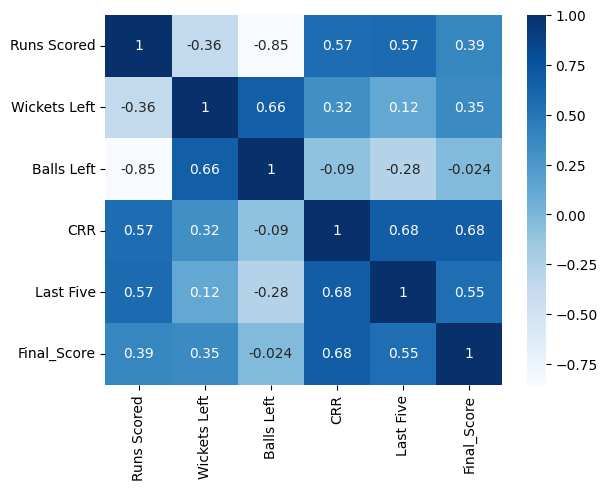

In [53]:
numerical_t20i_df = final_df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(data=numerical_t20i_df.corr(), annot=True, cmap='Blues');

## <span style="color:blue">**Model Building**</span>

In [54]:
# Splitting the dataset into features and target variable

X = final_df.drop(columns=['Final_Score'])
y = final_df['Final_Score']

##### Preparing Training and Test Sets

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

##### Importing Dependencies for Data Transformation, Modeling, and Evaluation

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

*Defining a ColumnTransformer to apply OneHotEncoding to categorical columns and keep numerical columns unchanged.*

In [57]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['Batting Team','Bowling Team','Location'])
]
,remainder='passthrough')

### <u><em>**XGBoost Regression**</em></u>


Creating a pipeline for the model that integrates data preprocessing with an XGBoost regression model. It encodes categorical variables, scales numerical features, and applies a powerful regression algorithm to predict `Final_Score` in 1st inning of T20I cricket matches.

In [72]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=2000,learning_rate=0.05,max_depth=12,random_state=1))
])

In [73]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print('------------ Model Evaluation ------------')
print('\n\t R2 Score: ',r2_score(y_test,y_pred))
print('\t  MAE    : ',mean_absolute_error(y_test,y_pred))

------------ Model Evaluation ------------

	 R2 Score:  0.9662012364250304
	  MAE    :  2.812511552066029


In [60]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'step3__n_estimators': [ 200, 500, 1000, 2000],
#     'step3__learning_rate': [0.05, 0.1, 0.2],
#     'step3__max_depth': [6, 9, 12],
#     # 'step3__subsample': [0.6, 0.8, 1.0],
#     # 'step3__colsample_bytree': [0.6, 0.8, 1.0]
# }

# # Set up the GridSearchCV
# grid_search = GridSearchCV(estimator=pipe,
#                            param_grid=param_grid,
#                            cv=5,
#                            verbose=2,
#                            n_jobs=-1)

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best CV Score:", best_score)

### <u><em>**Random Forest Regression**</em></u>

The pipeline encodes categorical variables, scales numerical features, and applies Random Forest regression to predict `Final_Score` in T20I matches.

In [61]:
pipe2 = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',RandomForestRegressor(n_estimators=1000, random_state=1))
])

In [62]:
pipe2.fit(X_train,y_train)
Y_pred = pipe2.predict(X_test)

print('------------ Model Evaluation ------------')
print('\n\t R2 Score: ',r2_score(y_test,Y_pred))
print('\t  MAE    : ',mean_absolute_error(y_test,Y_pred))

------------ Model Evaluation ------------

	 R2 Score:  0.9492984299274574
	  MAE    :  3.79031030625886


## <span style="color:blue">**Prediction**</span>

#### ICC Men's T20 World Cup 2024
- **17th Match, Group B, Bridgetown, June 08, 2024**
- **Link:** [Match Overview](https://www.espncricinfo.com/series/icc-men-s-t20-world-cup-2024-1411166/australia-vs-england-17th-match-group-b-1415717/match-overs-comparison)

##### Match Details:
- **Australia v/s England**

- Batting Team : *Australia*
- Bowling Team : *England*
- Runs Scored  : *140*
- Wickets Left : *7*
- Balls Left   : *36*
- CRR          : *10.00*
- Last Five    : *43*
- Location     : *West Indies*

#### ***Final Score: 201/7***

In [74]:
# Define a single test data point as a DataFrame
data_point = pd.DataFrame([['Australia', 'England', 140, 7, 36, 10.00, 43, 'West Indies']],
                          columns=['Batting Team', 'Bowling Team', 'Runs Scored', 
                                   'Wickets Left', 'Balls Left', 'CRR', 'Last Five', 'Location'])

*As the 'ColumnTransformer' expects a pandas DataFrame when specifying columns by name, we need to pass the input data as a DataFrame with the appropriate column names.*

In [75]:
# Making a prediction using the trained XGBoost model pipeline
predicted_final_score = pipe.predict(data_point)

# Display the predicted final score
print(f"Predicted Final Score: {int(predicted_final_score[0])}",' ||  Actual Score: 201')

Predicted Final Score: 201  ||  Actual Score: 201


In [76]:
# Making a prediction using the trained Random Forest model pipeline
predicted_final_score = pipe2.predict(data_point)

# Display the predicted final score
print(f"Predicted Final Score: {int(predicted_final_score[0])}",' ||  Actual Score: 201')

Predicted Final Score: 192  ||  Actual Score: 201


## Saving the Model

*As XGBoost model provided more accurate predictions and has better R2 Score than other models, we save XGBoost model for making predictions on web application.*

In [77]:
import pickle

pickle.dump(pipe,open('pipe.pkl','wb'))